<a href="https://colab.research.google.com/github/koushik7074/FB_Prophet/blob/main/FB_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import dependencies**

In [5]:
!pip install prophet

In [26]:
import pandas as pd
from  prophet import Prophet

## **Read in data**

In [7]:
df = pd.read_csv('dataset.csv')
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [11]:
df.shape

(1080, 4)

In [9]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [10]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [13]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

## Covert into date time object

In [17]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day'])

In [18]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [19]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [20]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis='columns', inplace=True)

In [23]:
df.columns = ['y', 'ds']

In [24]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


## **Train the model**

In [27]:
m = Prophet(interval_width = 0.95, daily_seasonality = True)
model = m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqidscurj/y3ljxxvj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqidscurj/6bge0wvt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68497', 'data', 'file=/tmp/tmpqidscurj/y3ljxxvj.json', 'init=/tmp/tmpqidscurj/6bge0wvt.json', 'output', 'file=/tmp/tmpqidscurj/prophet_modelo13ad3_v/prophet_model-20230707073733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.561512,799.383819,4128.758433,3042.561512,3042.561512,-638.399466,-638.399466,-638.399466,471.949669,...,16.625235,16.625235,16.625235,-1126.974369,-1126.974369,-1126.974369,0.0,0.0,0.0,2404.162046
1,2018-01-02,3043.293094,876.894529,3945.601267,3043.293094,3043.293094,-648.583698,-648.583698,-648.583698,471.949669,...,-11.279246,-11.279246,-11.279246,-1109.254121,-1109.254121,-1109.254121,0.0,0.0,0.0,2394.709396
2,2018-01-03,3044.024676,824.178136,3905.348979,3044.024676,3044.024676,-622.804684,-622.804684,-622.804684,471.949669,...,-4.408750,-4.408750,-4.408750,-1090.345602,-1090.345602,-1090.345602,0.0,0.0,0.0,2421.219992
3,2018-01-04,3044.756258,787.421430,4046.237813,3044.756258,3044.756258,-575.884282,-575.884282,-575.884282,471.949669,...,22.490694,22.490694,22.490694,-1070.324645,-1070.324645,-1070.324645,0.0,0.0,0.0,2468.871975
4,2018-01-05,3045.487839,908.979594,4064.970421,3045.487839,3045.487839,-611.942497,-611.942497,-611.942497,471.949669,...,-34.572281,-34.572281,-34.572281,-1049.319885,-1049.319885,-1049.319885,0.0,0.0,0.0,2433.545342


In [32]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2018-01-01,2404.162046
1,2018-01-02,2394.709396
2,2018-01-03,2421.219992
3,2018-01-04,2468.871975
4,2018-01-05,2433.545342
...,...,...
1175,2021-03-22,3722.624441
1176,2021-03-23,3706.244860
1177,2021-03-24,3721.862785
1178,2021-03-25,3754.149049


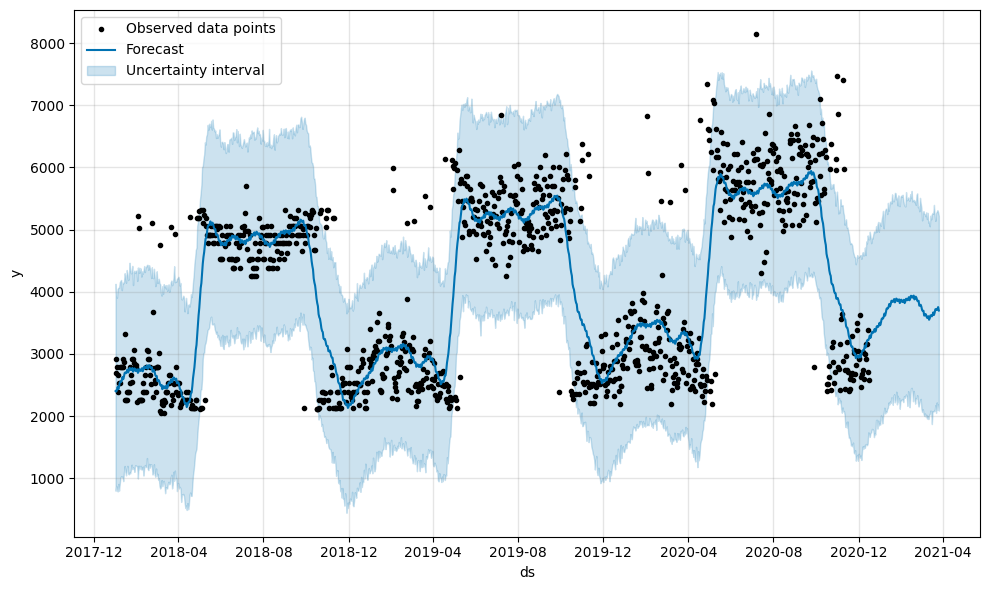

In [35]:
plot1 = m.plot(forecast, include_legend = True)

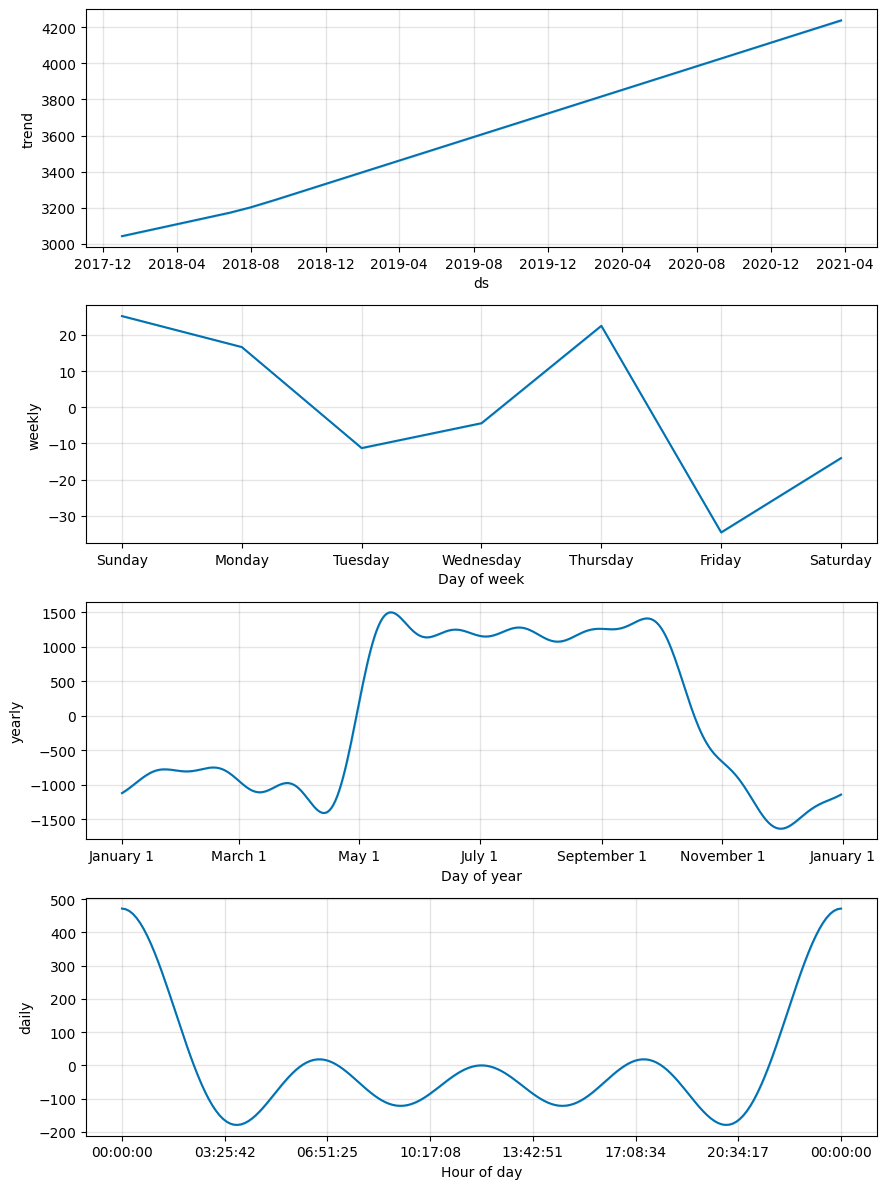

In [34]:
plot2 = m.plot_components(forecast)